<a href="https://colab.research.google.com/github/CodeTunisia/PysNum2022/blob/main/jour2/integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valeur approchée d’une intégrale
### Méthode des rectangles
La première méthode qui vienne à l'esprit, c'est de découper l'aire entre la courbe $f(x)$, l'axe des $x$ et les droites $x= a$ et $x = b$, en une multitude de **petits rectangles**. Découpons l'intervalle $[a,b]$ en rectangles élémentaires de largeur $h$, $h$ étant petit. Le rectangle $n^\circ i$ aura donc pour longueur `f(a + i*h)`. Sa surface est donc égale à `h*f(a + i*h)`. L'aire sous la courbe entre a et b est obtenue en sommant tous ces petits rectangles. Reste qu'en posant cette relation, j'ai fait l'hypothèse implicite que la courbe limite le coté gauche de mon rectangle. On peut imaginer d'autres découpages. Voyons cela sur un schéma:

<img src="https://github.com/CodeTunisia/PysNum2022/blob/main/jour2/images/rectangles.png?raw=1" width=500>

Comme vous le constatez, on a le choix entre trois techniques:
* on fait coïncider le sommet haut gauche du rectangle avec la courbe : c'est la méthode des rectangles à gauche,

* on fait coïncider le sommet haut droit du rectangle avec la courbe : c'est la méthode des rectangles à droite,

* on fait coïncider le milieu du coté haut du rectangle avec la courbe: c'est la méthode du point milieu

Posons $h = (b - a)/n$, où $n$ est le nombre de rectangles avec lesquels nous allons paver l'aire à calculer. Évidement, plus $n$ sera grand et plus la précision du calcul sera grande. Un rapide calcul nous montre que dans le cas:

1 - méthode des rectangles à gauche, on obtient:
$$
\begin{align*}
\int_{a}^{b}f(x)dx \approx h \sum_{i=0}^{n-1}f(x_i) \quad ;avec \ x_i  = a + ih
\end{align*}
$$

2 - méthode des rectangles à droite, on obtient:
$$
\begin{align*}
\int_{a}^{b}f(x)dx \approx h \sum_{i=0}^{n-1}f(x_i) \quad ;avec \ x_i  = a + (i + 1)h
\end{align*}
$$

3 - méthode du point milieu, on obtient:
$$
\begin{align*}
\int_{a}^{b}f(x)dx \approx h \sum_{i=0}^{n-1}f(xi) \quad ;avec \ x_i  = a + (i+\dfrac{1}{2})h
\end{align*}
$$


In [19]:
import matplotlib.pyplot as plt
import numpy as np
def rect_gauche(f, a, b, n):
    h = (b-a)/n
    I = 0
    for i in range(n):
        xi = a + i * h
        I+= f(xi)
    return h*I
def rect_droite(f, a, b, n):
    h = (b-a)/n
    I = 0
    for i in range(n):
        xi = a + (i+1) * h
        I+= f(xi)
    return h*I
def rect_milieu(f, a, b, n):
    h = (b-a)/n
    I = 0
    for i in range(n):
        xi = a + (i+0.5) * h
        I+= f(xi)
    return h*I
def f(x):
    return 3*x**2*np.exp(x**3)
def F(x):
    return np.exp(x**3) - 1
I_exacte = F(1) - F(0)
erreur_g = I_exacte - rect_gauche(f, 0, 1, 100)
erreur_d = I_exacte - rect_droite(f, 0, 1, 100)
erreur_m = I_exacte - rect_milieu(f, 0, 1, 100)
print("Meth Gauche : E = {}\nMeth droite : E = {} \nMeth Milieu : E = {}".format(erreur_g, erreur_d, erreur_m))



Meth Gauche : E = 0.04043446428115183
Meth droite : E = -0.04111399057261966 
Meth Milieu : E = 0.0001698732921089352


## Exercice : Orbitales atomiques
Pour décrire la trajectoire d'un électron autour d'un noyau, une description probabiliste est adoptée : l'électron n'est plus caractérisé par ses coordonnées spatiales mais par sa *probabilité de présence* en un point de l'espace.

Pour simplifier le problème, on considérera que cette probabilité de présence ne dépend que de la variable $r$, distance entre l'électron et le centre du noyau. Pour une orbitale $1s$, la probabilité de trouver l'électron entre les rayons $r_1$ et $r_2$ s'écrit :
$$
\begin{align*}
P_{s1} = \int_{r_1}^{r_2} \underbrace{4 \times \frac{r^2}{a_0^3} \times e^{-2 \times \frac{r}{a_0}}}_\text{densité radiale} dr
\end{align*}
$$

avec $a_0 = 0.529$ A, appelé le rayon de Bohr.

La densité radiale, représentée dans la figure suivante, est maximale pour $r = a_0$. Ce rayon qui maximise la densité radiale est appelé le rayon orbitalaire.

**À noter :** Dans ce problème, les distances seront conservées en Angström.

![](https://github.com/CodeTunisia/PysNum2022/blob/main/jour2/images/densite_radiale.png?raw=1)

**a)** Définir une fonction `densite_radiale()`, définie entre $0$ et $\infty$ qui prend comme paramètre variable un rayon $r$ et comme paramètre par défaut $a_0 = 0.529$ $A$ et renvoie la valeur $4 \times \frac{r^2}{a_0^3} \times e^{-2 \times \frac{r}{a_0}}$.

**b)** Tracer la densité radiale pour $r \in [0, 2.6] \quad A$, afin d'obtenir le même graphique sur la figure ci-dessus.

**c)** On souhaite déterminer la probabilité de présence de l'électron entre $0$ et $a_0$. Évaluer cette probabilité à l'aide de $100$ rectangles. On pourra vérifier que la réponse obtenue est proche de $0.32$.

**d)** Déterminer le nombre entier $n$, tel que l'électron ait une probabilité supérieure ou égale à $90 \%$ de se trouver entre $0$ et $n*a_0$.

**e)** On souhaite désormais évaluer la probabilité de trouver l'électron proche du rayon de Bohr, c'est-à-dire entre $0.9*a_0$ et $1.1*a_0$. Évaluer cette probabilité à l'aide de 100 rectangles.

**f)** D'après la valeur obtenue à la question précédente, que penser de la description des trajectoires des électrons par orbite autour du noyau ?

### Méthode des trapèzes
L'idée de la méthode des trapèzes est d'approcher l'aire sous la courbe par des trapèzes dont l'aire est facilement calculables comme sur la figure ci-dessous (les bases des trapèzes sont verticales).

<img src="https://github.com/CodeTunisia/PysNum2022/blob/main/jour2/images/trapezes.png?raw=1" width=500>

Pour cela, on procède comme suit :

1 - on commence par choisir le nombre $n$ de trapèzes qu'on veut sous la courbe . Plus le nombre sera grand, plus la surface formée par les trapèzes sera proche de l'aire sous la courbe.

2 - on répartit sur $[a,b]$ $n+1$ points de la façon équitable suivante : $x_0 = a$ et $x_{n+1} = x_n + h$, $h = (b-a)/n$.

3 - l'aire de chaque petit trapèze est $A_i =\dfrac{(base1+base2) \times hauteur}{2} = \dfrac{h}{2} \times [f(x_i) + f(x_{i-1})]$.

4 - Nous obtenons l'aire recherchée en sommant l'aire de tous les trapèzes entre a et b, ce qui nous donne :

$$
\begin{align*}
\int_{a}^{b}f(x)dx \approx \dfrac{h}{2}(f(a) +f(b)) + h \sum_{i=1}^{n-1} f(x_i)
\end{align*}
$$

avec $x_i = a + ih$


In [24]:
def trapeze(f, a, b, n):
    h = (b - a)/n
    I = 0.5*(f(a)+ f(b))
    for i in range(1, n):
        xi = a + i *h
        I+= f(xi)
    return h*I
erreur_m = I_exacte - rect_milieu(f, 0, 1, 50)
erreur_t = I_exacte - trapeze(f, 0, 1, 50)
print(erreur_m, erreur_t)

0.000679261451830282 -0.0013587877432978956


## Exercice : Calcul de distance
Supposons que vous accélérez votre voiture du repos et demandez-vous jusqu'où vous allez en $T$ secondes. La distance est donnée par l'intégrale $\int_0^T v(t)dt$ , où $v (t)$ est la vitesse en fonction du temps. Une fonction de vitesse en augmentation rapide pourrait être:
$$
v\left(t\right) = 3t^{2}e^{t^3}\thinspace
$$
La distance après une seconde est
$$
\int_0^1 v(t)dt
$$
qui est l'intégrale que nous cherchons à calculer par des méthodes numériques.


<img src="https://github.com/CodeTunisia/PysNum2022/blob/main/jour2/images/integral_of_f.png?raw=1" width=400>

**a)** L'expression choisie de la vitesse a une forme qui permet de calculer facilement la primitive comme $V(t) = e^{t^3}-1$. Calculer la valeur exacte de l’intégrale.

**b)** alculer la valeur approchée de $\int_0^1 v(t)dt$ avec les fonctions `rectangle` et `trapze`. Comparer les résultats avec la solution exacte pour $n = 4$.

### Intégration Monte Carlo
Les méthodes de Monte Carlo sont des techniques de calcul probabilistes. Au cœur, un algorithme de Monte Carlo représente de façon aléatoire certaines valeurs de l'espace de valeurs d'un paramètre considéré. La combinaison de plusieurs paramètres permet de tirer des conclusions stochastiques des relations. L'intégration des fonctions mathématiques de la forme:

$$
A = \int_a^b f(x) \cdot dx
$$

Pour effectuer une intégration, nous voulons savoir comment les valeurs sélectionnées au hasard sont réparties: lesquelles des valeurs sont égales ou inférieures à la valeur de la fonction et lesquelles sont supérieures. Il s'agit d'une décision binaire qui divise les valeurs aléatoires en deux groupes. Du rapport de la taille des groupes, nous pouvons tirer nos conclusions.

Nous utilisons la fonction (intégrande) comme critère de décision uniquement. L'algorithme ne nous fournit rien d'autre que des comptes/fréquences. La fermeture probabiliste est alors:
$$
\frac{\textrm{cas favorables}} {\textrm{cas possibles}} = \frac {n}{N} = \frac{A_{sous\;la\;fonction}}{A_{aire \;totale}}
$$

La zone $A_{sous\;la\;fonction}$ est la zone inconnue qui nous intéresse. Pour $A_{aire \;totale}$, nous choisissons arbitrairement une région simple, cette zone que nous pouvons calculer sans difficultés.


### Exemple: détermination de $\pi$
À titre d'exemple, nous choisissons un cercle dont la fonction mathématique est donnée par la première:
$$
\begin{align*}
x^2 + y^2 &= R^2 \\
y = f(x) &= \sqrt{R^2 - x^2}
\end{align*}
$$


Pour l'estimation de $\pi$, l'aire du cercle est comparée à l'aire du carré $2R \times 2R$, ce rapport est $\pi / 4$:

$$
\begin{align*}
A_{cercle} &= R^2 \cdot \pi \\
A_{carré} &= {(2R)}^2 = 4R^2
\end{align*}
$$

Nous générons au hasard $(x_rand, y_rand)$-points. Pour chaque point, nous devons décider s'il se trouve à l'intérieur ou à l'extérieur du cercle. Pour cela, nous utilisons la différence $y_{rand} - f(x_{rand})$, où $f(x) = \sqrt{R^2 - x^2}$ est la fonction d'un cercle dans le premier quadrant. Nous pouvons compter le nombre de points à l'intérieur du cercle. Nous pouvons compter le nombre de points à l'intérieur du cercle. Le rapport $n / N$ est supposé être égal au rapport $A_{cercle}/A_{carré}$

$$
\begin{align*}
\frac {\textrm{n = (x,y)-points dans le cercle}}  {\textrm{N = (x,y)-points dans le carré}} &= \frac{A_{cercle}}{A_{carré}}
 = \frac {R^2 \cdot \pi}{4R^2 } = \frac {\pi}{4} \\
\pi &= 4\frac{n}{N}
\end{align*}
$$

**implémentation :**

Nous avons vu l'intégration de Monte Carlo lorsque nous avons calculé $\pi / 4$ en calculant l'aire du quart de cercle unitaire.

Voici le code:



PI numpy       :  3.141592653589793
PI monte carlo :  3.1436
différence     :  0.002007346410207056


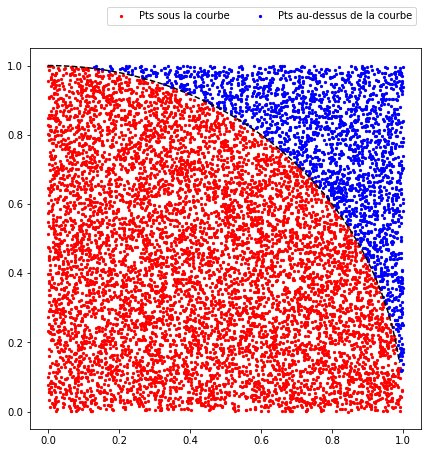

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    '''
    fonction pour un cercle
    '''
    return np.sqrt(1-x*x)

N = 10000   # nombre d'essais
x0 = 0
x1 = 1

x = np.arange(x0, x1, 0.01)
y = f(x)
fmax = max(y)
np.random.seed(6)
x_rand = x0 + (x1 - x0) * np.random.rand(N)
y_rand = fmax * np.random.rand(N)
n = np.sum(y_rand - f(x_rand) < 0.0) # nombre de points dans le cercle
#----- Sortie et graphiques -------------------
print('PI numpy       : ', np.pi)
print('PI monte carlo : ', 4*n/N)
print('différence     : ', 4*n/(N) - np.pi)

index_below = np.where(y_rand < f(x_rand))
index_above = np.where(y_rand >= f(x_rand))
plt.figure(figsize=(7,7))
plt.plot(x,f(x),'--k')
plt.scatter(x_rand[index_below], y_rand[index_below],
            c="r", s = 5, label = "Pts sous la courbe")
plt.scatter(x_rand[index_above], y_rand[index_above],
            c="b", s = 5, label = "Pts au-dessus de la courbe")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol=2)
plt.show()